In [1]:
import pandas as pd

In [2]:
ipc = pd.read_csv('ipc.csv')

In [3]:
ipc

,IPC
0,30.210
1,30.321
2,30.349
3,30.430
4,30.433
...,...
87,62.939
88,63.380
89,63.633
90,64.170


In [4]:
from scipy.stats import boxcox

In [5]:
ipc['T(IPC)'], lambdaa = boxcox(ipc['IPC'])

In [6]:
lambdaa

-1.791403562664271

In [7]:
ipc

,IPC,T(IPC)
0,30.210,0.556976
1,30.321,0.556984
2,30.349,0.556986
3,30.430,0.556992
4,30.433,0.556993
...,...,...
87,62.939,0.557887
88,63.380,0.557891
89,63.633,0.557894
90,64.170,0.557899


In [8]:
# aplicamos la diferencia 
ipc['dT(IPC)'] = ipc['T(IPC)'].diff()

In [9]:
ipc

,IPC,T(IPC),dT(IPC)
0,30.210,0.556976,NaN
1,30.321,0.556984,8.154596e-06
2,30.349,0.556986,2.043875e-06
3,30.430,0.556992,5.883105e-06
4,30.433,0.556993,2.170537e-07
...,...,...,...
87,62.939,0.557887,4.199479e-06
88,63.380,0.557891,4.156205e-06
89,63.633,0.557894,2.348175e-06
90,64.170,0.557899,4.898666e-06


In [10]:
# aplicamos la diferencia 
ipc['d2T(IPC)'] = ipc['dT(IPC)'].diff()

In [11]:
ipc

,IPC,T(IPC),dT(IPC),d2T(IPC)
0,30.210,0.556976,NaN,NaN
1,30.321,0.556984,8.154596e-06,NaN
2,30.349,0.556986,2.043875e-06,-6.110720e-06
3,30.430,0.556992,5.883105e-06,3.839229e-06
4,30.433,0.556993,2.170537e-07,-5.666051e-06
...,...,...,...,...
87,62.939,0.557887,4.199479e-06,-1.781441e-06
88,63.380,0.557891,4.156205e-06,-4.327395e-08
89,63.633,0.557894,2.348175e-06,-1.808030e-06
90,64.170,0.557899,4.898666e-06,2.550491e-06


# aplicamos la diferencia 
ipc['dT(IPC)'] = ipc['T(IPC)'].diff()

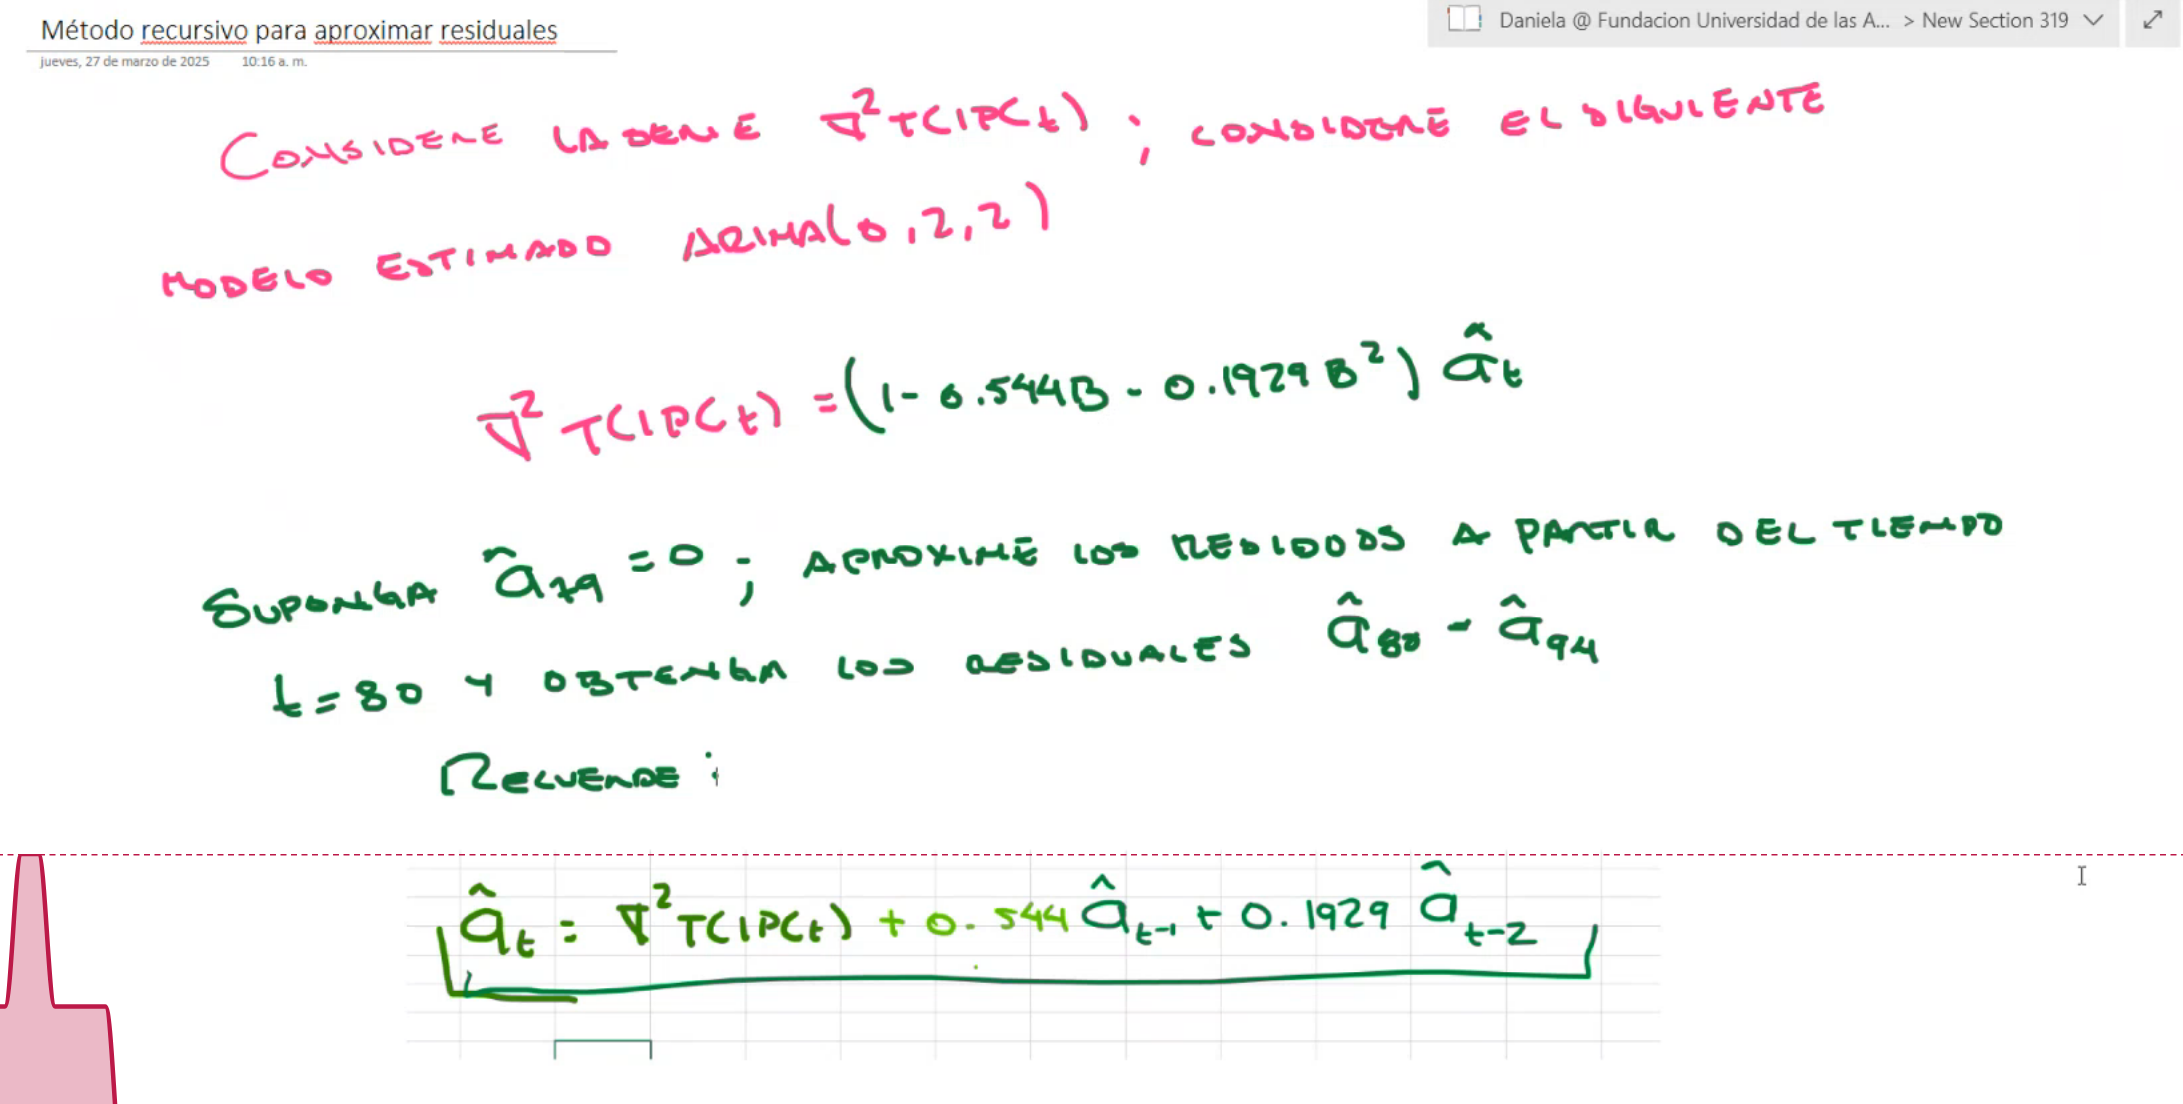

$$
\nabla^2 T(\text{IPC}_t) = (1 - 0.544B - 0.1929B^2) \hat{Z}_t
$$

$$
\hat{Z}_t = \nabla^2 T(\text{IPC}_t) + 0.544\hat{Z}_{t-1} + 0.1929\hat{Z}_{t-2}
$$

Sea $\hat{Z}_{79}=0$

In [25]:
serie = ipc['d2T(IPC)'].dropna()

In [33]:
# nos quedamos del 79 en adelante
serie = ipc[['d2T(IPC)']].iloc[79:]

In [34]:
serie

,d2T(IPC)
79,3.540743e-07
80,-1.043635e-06
81,-1.493358e-06
82,1.211672e-06
83,6.974468e-07
84,7.035651e-06
85,-8.211222e-07
86,-5.633940e-06
87,-1.781441e-06
88,-4.327395e-08


In [39]:
serie[['0.544Zt-1', '0.1929Zt-2', 'Zt']] = 0

In [40]:
serie

,d2T(IPC),0.544Zt-1,0.544Zt-2,0.1929Zt-2,Zt
79,3.540743e-07,0,0,0,0
80,-1.043635e-06,0,0,0,0
81,-1.493358e-06,0,0,0,0
82,1.211672e-06,0,0,0,0
83,6.974468e-07,0,0,0,0
84,7.035651e-06,0,0,0,0
85,-8.211222e-07,0,0,0,0
86,-5.633940e-06,0,0,0,0
87,-1.781441e-06,0,0,0,0
88,-4.327395e-08,0,0,0,0


In [ ]:
# serie